Num of cores are:  2
Number of results: 100
Total time taken with 1 threads: 13.4497 seconds
Number of results: 100
Total time taken with 2 threads: 13.5572 seconds
Number of results: 100
Total time taken with 3 threads: 11.3754 seconds
Number of results: 100
Total time taken with 4 threads: 8.0278 seconds
Number of results: 100
Total time taken with 5 threads: 7.1778 seconds
Number of results: 100
Total time taken with 6 threads: 8.1566 seconds
Number of results: 100
Total time taken with 7 threads: 7.1336 seconds
Number of results: 100
Total time taken with 8 threads: 8.2848 seconds
Number of results: 100
Total time taken with 9 threads: 8.2278 seconds
Number of results: 100
Total time taken with 10 threads: 7.2650 seconds
Number of results: 100
Total time taken with 11 threads: 8.1210 seconds
Number of results: 100
Total time taken with 12 threads: 6.9800 seconds
Number of results: 100
Total time taken with 13 threads: 8.1446 seconds
Number of results: 100
Total time taken with 14 t

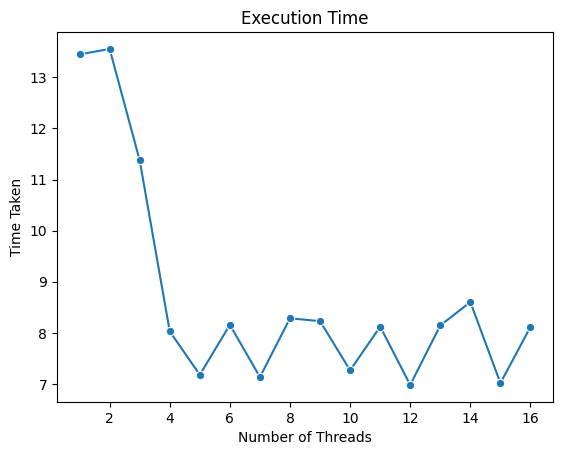

In [1]:
import os
import sys
import platform
import multiprocessing
import threading
import random as r
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


numberOfCores = multiprocessing.cpu_count()
print ("Num of cores are: ", numberOfCores)

def matrix_multiply(mat1, mat2):
    return np.dot(mat1, mat2)

def perform_matrix_multiplications(num_matrices, matrix_size, constant_matrix, results, results_lock):
    for _ in range(num_matrices):
        random_matrix = np.random.rand(*matrix_size)

        result = matrix_multiply(random_matrix, constant_matrix)

        with results_lock:
            results.append(result)

def main(num_threads):
    matrix_size = (1000, 1000)
    num_matrices = 100

    constant_matrix = np.random.rand(*matrix_size)

    results = []
    results_lock = threading.Lock()

    threads = []

    matrices_per_thread = num_matrices // num_threads
    remaining_matrices = num_matrices % num_threads

    start_time = time.time()

    for _ in range(num_threads):
        if remaining_matrices > 0:
            num_matrices_this_thread = matrices_per_thread + 1
            remaining_matrices -= 1
        else:
            num_matrices_this_thread = matrices_per_thread

        thread = threading.Thread(
            target=perform_matrix_multiplications,
            args=(num_matrices_this_thread, matrix_size, constant_matrix, results, results_lock),
        )
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    end_time = time.time()

    total_time = end_time - start_time

    print(f"Number of results: {len(results)}")
    print(f"Total time taken with {num_threads} threads: {total_time:.4f} seconds")
    return total_time

num_threads=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
tt=[]
for i in range(0,len(num_threads)):
    tt.append(main(num_threads[i]))

sns.lineplot(x=num_threads, y=tt, marker='o')
plt.title('Execution Time')
plt.xlabel('Number of Threads')
plt.ylabel('Time Taken')
plt.show()